<a href="https://colab.research.google.com/github/thebabycode/Neural-Networks-and-Deep-Learning/blob/main/NNDL_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn

In [ ]:
data = pd.read_csv("bitcoincloseprice.csv")
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
108756,1373224980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108757,1373225040,69.54,69.54,69.54,69.54,0.550000,38.247000,69.540000
108758,1373225100,69.54,69.90,69.00,69.00,106.011606,7342.185920,69.258322
108759,1373225160,69.00,69.99,68.99,69.49,43.396894,3028.343894,69.782503


In [ ]:
from tabulate import tabulate
info = [[col, data[col].count(), data[col].max(), data[col].min()] for col in data.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Max', 'Min'], tablefmt = 'orgtbl'))

| Feature           |   Count |              Max |      Min |
|-------------------+---------+------------------+----------|
| Timestamp         |  108761 |      1.37323e+09 | 13732    |
| Open              |   77958 |    146.31        |     4.39 |
| High              |   77958 |    151.65        |     4.39 |
| Low               |   77958 |    146.3         |     4.39 |
| Close             |   77958 |    148.61        |     4.39 |
| Volume_(BTC)      |   77958 |   1417.78        |     0    |
| Volume_(Currency) |   77958 | 184018           |     0    |
| Weighted_Price    |   77958 |    146.304       |     4.39 |


In [ ]:
print(data.isna().sum())


Timestamp                0
Open                 30803
High                 30803
Low                  30803
Close                30803
Volume_(BTC)         30803
Volume_(Currency)    30803
Weighted_Price       30803
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
print('total missing values : ' + str(data.isna().sum().sum()))

total missing values : 0


In [ ]:
data = data[data['Timestamp'] > (data['Timestamp'].max()-650000)]

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data = data.drop(['Timestamp', 'Low', 'High', 'Volume_(BTC)', 'Weighted_Price'], axis = 1)

In [ ]:
info = [[col, data[col].count(), data[col].max(), data[col].min()] for col in data.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Max', 'Min'], tablefmt = 'orgtbl'))

| Feature           |   Count |       Max |   Min |
|-------------------+---------+-----------+-------|
| Open              |    6863 |     90.3  | 63.12 |
| Close             |    6863 |     90.29 | 63.12 |
| Volume_(Currency) |    6863 | 120636    |  0    |


In [ ]:
data.shape

(6863, 3)

In [ ]:
x = np.array(data.drop(['Close'], axis = 1))
y = np.array(data['Close'])

In [ ]:
print(x.shape)
print(y.shape)

(6863, 2)
(6863,)


In [ ]:
print(x.max())
print(x.min())

120635.8206
0.0


In [ ]:
print(y.max())
print(y.min())

90.29
63.12


In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [ ]:
t = np.reshape(y, (-1,1))
y = StandardScaler().fit_transform(t)
y = y.reshape(-1)

In [ ]:
print(x.max())
print(x.min())

26.95624514323622
-1.8654992079249695


In [ ]:
print(y.max())
print(y.min())

1.400216379323426
-1.864718057008862


In [ ]:
length = 500
x_temp = []
y_temp = []
for i in range(length,x.shape[0]) :
    x_temp.append(x[i-length: i])
    y_temp.append(y[i])
x_temp = np.array(x_temp)
y_temp = np.array(y_temp)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_temp, y_temp, test_size = 0.2, random_state = 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(5090, 500, 2)
(5090,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(1273, 500, 2)
(1273,)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import SimpleRNN
from keras.layers import BatchNormalization

from keras.layers import Input

In [ ]:
def simp_layer (hidden1) :
    
    model = Sequential()
    # add input layer
    model.add(Input(shape = (500, 2, )))
    # add rnn layer
    model.add(SimpleRNN(hidden1, activation = 'tanh', return_sequences = False))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # add output layer
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    return model

In [ ]:
model = simp_layer(10)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                130       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 161
Non-trainable params: 20
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./bit_model.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)

In [ ]:
import time
beg = time.time()

In [ ]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test), callbacks = [checkp])

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 1.4006
Epoch 1: val_loss improved from inf to 0.16380, saving model to ./bit_model.h5
160/160 [==============================] - 13s 71ms/step - loss: 1.4006 - val_loss: 0.1638
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.5663
Epoch 2: val_loss improved from 0.16380 to 0.06299, saving model to ./bit_model.h5
160/160 [==============================] - 10s 65ms/step - loss: 0.5663 - val_loss: 0.0630
Epoch 3/10
159/160 [============================>.] - ETA: 0s - loss: 0.4041
Epoch 3: val_loss improved from 0.06299 to 0.03613, saving model to ./bit_model.h5
160/160 [==============================] - 11s 67ms/step - loss: 0.4045 - val_loss: 0.0361
Epoch 4/10
160/160 [==============================] - ETA: 0s - loss: 0.3173
Epoch 4: val_loss improved from 0.03613 to 0.02349, saving model to ./bit_model.h5
160/160 [==============================] - 11s 66ms/step - loss: 0.3173 - val_loss: 0.0235


In [ ]:
end = time.time()

In [ ]:
from keras.models import load_model
model = load_model('./bit_model.h5')

In [ ]:
pred = model.predict(x_test)

40/40 [==============================] - 2s 34ms/step


In [ ]:
print(pred.shape)

(1273, 1)


In [ ]:
pred = pred.reshape(-1)

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE : ' + str(mean_squared_error(y_test, pred)))

MSE : 0.009396366283599673


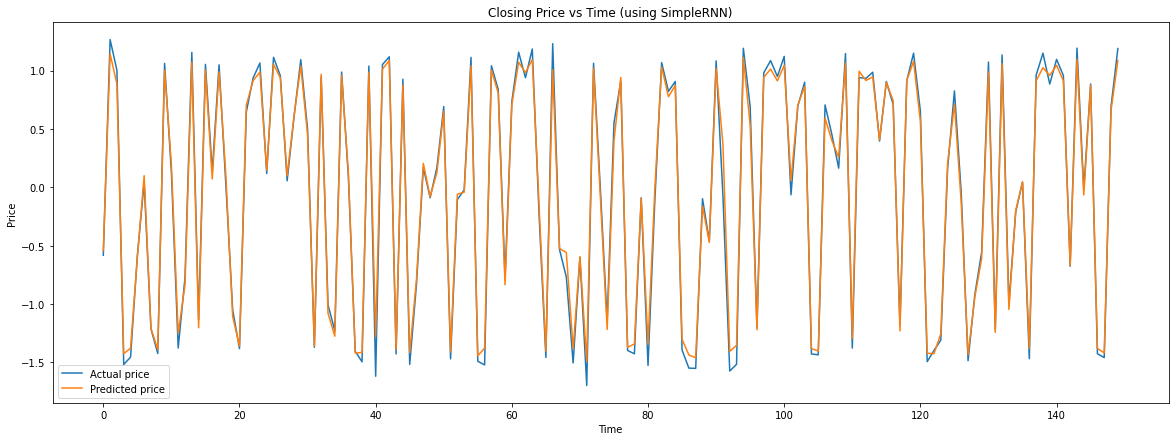

In [ ]:
plt.figure(figsize = (20,7))
plt.plot(y_test[50:200])
plt.plot(pred[50:200])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Closing Price vs Time (using SimpleRNN)')
plt.legend(['Actual price', 'Predicted price'])
plt.show()

In [ ]:
print('Time taken for SimpleRNN model to learn : ' + str(end-beg) + ' sec.')

Time taken for SimpleRNN model to learn : 128.29416179656982 sec.
